In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout, TrainerSingleRun, TrainerEnsemble
from src.Logger import Logger


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "MS",
	"training_date": "current", # values: earlier, current
	"mode": "single_run", # values: mcd, single_run, ensemble
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	trainerClass = TrainerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	trainerClass = TrainerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	trainerClass = TrainerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]

	dataset = PAMultipleDates(config = config,
			   dates = dates, 
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]

	dataset = MTMultipleDates(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MS':
	dates = [2019, 2020]
	dataset = MSMultipleDates(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)		
else:
	raise ValueError('Invalid site')

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 3
	repetition_id = 0
	
logger = Logger()
trainer = trainerClass(config, dataset, patchesHandler, logger)
trainer.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'MS', 'training_date': 'current', 'mode': 'single_run', 'uncertainty_method': 'pred_entropy_single', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:321 in __init__()- list(self.date_ids): [0]
ic| dataset.py:342 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 9
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [8]:
trainer.config

{'training': True,
 'inferring': True,
 'site': 'MS',
 'training_date': 'current',
 'mode': 'single_run',
 'uncertainty_method': 'pred_entropy_single',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

3

In [10]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:431 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:434 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:438 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:442 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:444 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:423 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


Removing bufer................
Mask label shape:  
 (18605, 19481, 1) 
 Unique values:  
 [0 1 2]


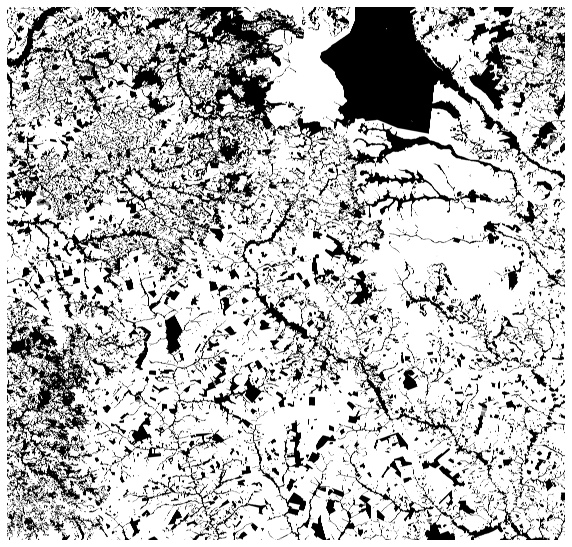

In [13]:
trainer.logger.plotFigure(trainer.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3721 3896
Mask size:  (18605, 19480)


In [15]:

trainer.label_mask.dtype

dtype('uint8')

In [16]:

trainer.getLabelCurrentDeforestation()

In [17]:

trainer.loadInputImage()

ic| dataset.py:371 in loadInputImage()
    image_stack.shape: (18605, 19481, 9)


Image shape:  (18605, 19481, 9)
mask:  (18605, 19480)
image stack:  (18605, 19480, 9)
ref : (18605, 19480, 1)


In [18]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.05263158, 0.10526316, 0.15789473, 0.21052632,
        0.2631579 , 0.31578946, 0.36842105, 0.42105263, 0.5263158 ,
        0.6315789 , 0.7368421 , 0.84210527, 0.94736844, 1.        ],
       dtype=float32),
 array([ 99662188,    560438,    316161,    440417,    310884,    701575,
           318766,    903906,   1003651,   1305903,   2096238,   3824633,
          6540581,   8716969, 235723090], dtype=int64))

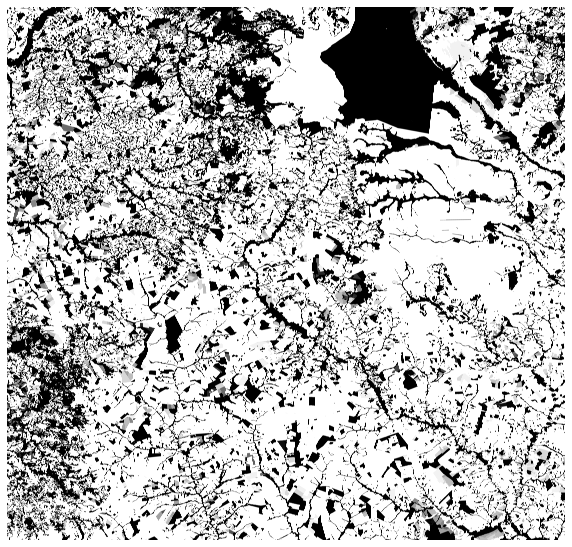

In [19]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

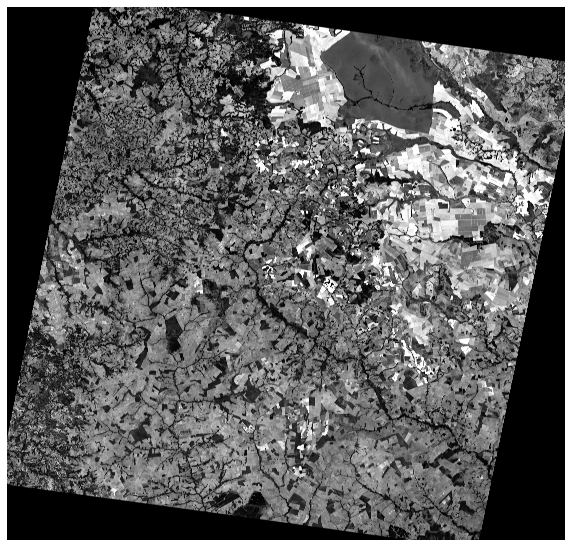

In [20]:

trainer.logger.plotFigure(trainer.image_stack[...,1], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [21]:
np.unique(trainer.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([ 99008239,    506597, 262910564], dtype=int64))

In [22]:
trainer.maskNoDataAsNotConsideredClass()

self.image_stack.shape (18605, 19480, 9)


In [23]:
np.unique(trainer.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([ 78429996,    386133, 283609271], dtype=int64))

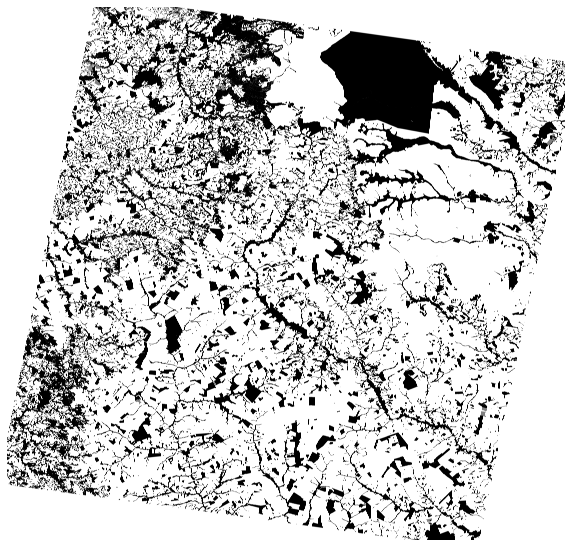

In [24]:

trainer.logger.plotFigure(trainer.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [ ]:

trainer.getImageChannels()

ic| base.py:99 in getImageChannels()
    self.image_stack.shape: (18605, 19480, 9)
ic| base.py:101 in getImageChannels()- self.channels: 9


In [ ]:

trainer.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


In [ ]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (18605, 19480, 1)
    im_idx_col.shape: (18605, 19480, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (18605, 19480, 2)
    im_idx.dtype: dtype('uint16')


In [ ]:
if config["training"] == True:
    trainer.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (487, 510, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (248370, 2)
    coords.dtype: dtype('uint16')


In [ ]:
if config["training"] == True:
    trainer.trainTestSplit()

ic| base.py:117 in trainTestSplit()
    self.coords_train.shape: (115271, 3)
    self.coords_val.shape: (28310, 3)


In [ ]:
if config["training"] == True:
    trainer.label_mask.shape

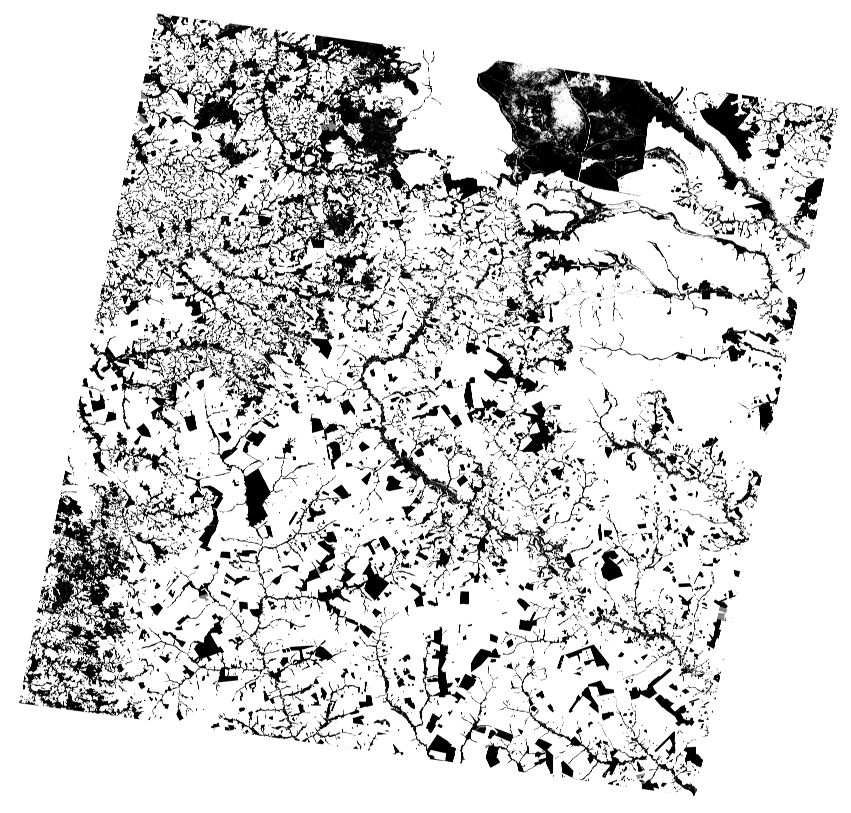

In [ ]:
if config["training"] == True:

    trainer.logger.plotFigure(trainer.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [ ]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [ ]:
if config["training"] == True:
    print(trainer.coords_train)

[[    0  3914     0]
 [    0  3952     0]
 [    0  3990     0]
 ...
 [18468 15352     0]
 [18468 15390     0]
 [18468 15428     0]]


In [ ]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

training samples:  (1100, 3) validation samples:  (199, 3)


In [ ]:
if config["training"] == True:
    inputSnipShow = True

In [ ]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [ ]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [ ]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [ ]:
trainer.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [ ]:
trainer.dataset.bands

4

ic

[16986 14706     0]
coord [16986 14706     0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.4239709
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.35195705


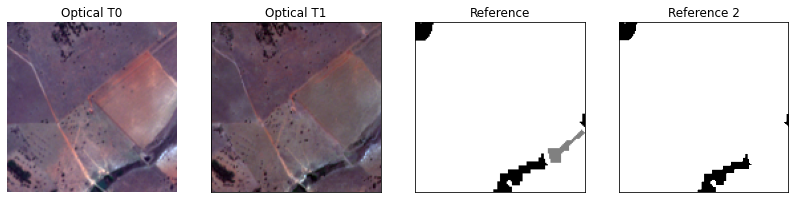

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.13227947
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.26146424


[1558 5054    0]
coord [1558 5054    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


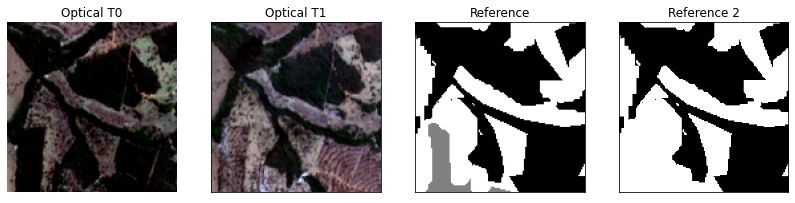

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.37044182
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3878483


[4598 7068    0]
coord [4598 7068    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


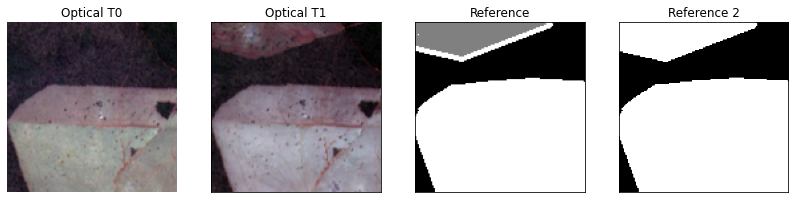

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.42490283
    np.mean(image_patch[...,dataset.previewBandsSnip[1]

[3990 7562    0]
coord [3990 7562    0]
image_patch.shape (18605, 19480, 1)
reference_patch.shape (18605, 19480, 9)


]): 0.38406196


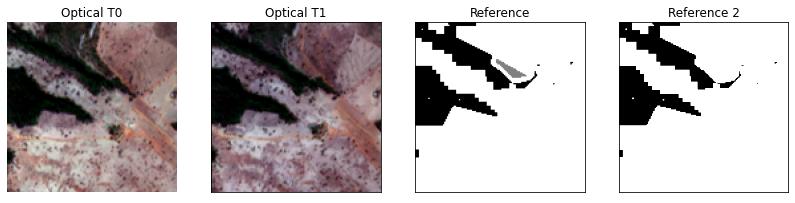

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [ ]:
if config["training"] == True:
    trainer.getGenerators()


In [ ]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [ ]:
if config["training"] == True:
    print(trainer.path_exp)

D:/Jorge/datasets/deforestation/experiments/MS/exp2


In [ ]:
if config["training"] == True:
    print(trainer.channels)

9


In [ ]:
if config["training"] == True:
    print(trainer.image_stack.shape)

(18605, 19480, 9)


In [ ]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [ ]:
if config["training"] == True:
    for tm in range(config['training_times']):
        trainer.repetition_id = tm
        trainer.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 9) 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 1312        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


103/103 [==============================] - 13s 79ms/step - loss: 0.0854 - accuracy: 0.5965 - val_loss: 0.0687 - val_accuracy: 0.6232

Epoch 00001: val_loss improved from inf to 0.06868, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp2/models\resunet_0.h5
Epoch 2/100
  1/103 [..............................] - ETA: 6s - loss: 0.0722 - accuracy: 0.5699

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


103/103 [==============================] - 7s 67ms/step - loss: 0.0612 - accuracy: 0.7169 - val_loss: 0.0588 - val_accuracy: 0.7022

Epoch 00002: val_loss improved from 0.06868 to 0.05883, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp2/models\resunet_0.h5
Epoch 3/100
103/103 [==============================] - 7s 66ms/step - loss: 0.0477 - accuracy: 0.8412 - val_loss: 0.0528 - val_accuracy: 0.8054

Epoch 00003: val_loss improved from 0.05883 to 0.05281, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp2/models\resunet_0.h5
Epoch 4/100
103/103 [==============================] - 7s 67ms/step - loss: 0.0403 - accuracy: 0.8813 - val_loss: 0.0478 - val_accuracy: 0.8308

Epoch 00004: val_loss improved from 0.05281 to 0.04780, saving model to D:/Jorge/datasets/deforestation/experiments/MS/exp2/models\resunet_0.h5
Epoch 5/100
103/103 [==============================] - 7s 67ms/step - loss: 0.0378 - accuracy: 0.8890 - val_loss: 0.0580 - val_accuracy: 0.8241



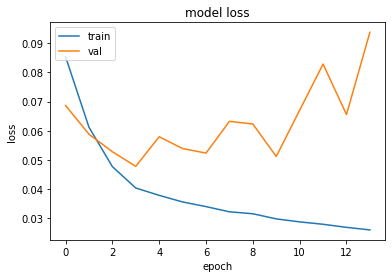

In [ ]:
if config["training"] == True:
    trainer.plotHistory()


In [ ]:
repetition_id = 0

In [ ]:
if config["inferring"] != True:
    sys.exit()
else:
    trainer.repetition_id = repetition_id

In [ ]:
trainer.image_stack.shape

(18605, 19480, 9)

In [ ]:
trainer.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [ ]:
trainer.image_stack.shape

(18605, 19480, 9)

In [ ]:
trainer.setPadding()

-35.0 -8.0


In [ ]:
trainer.infer()

ic| base.py:266 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MS/exp2/models/resunet_0.h5'


Dropout training mode: False
time:  0


In [ ]:
trainer.loadPredictedProbabilities()

In [ ]:
trainer.prob_rec.shape

(18640, 19488, 1)

In [ ]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [ ]:
trainer.prob_rec.shape

(18640, 19488, 1)

In [ ]:
trainer.getMeanProb()

In [ ]:
trainer.logger.getStats(trainer.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 1.5813328e-07
    np.mean(value): 0.006024787
    np.max(value): 0.9532573


In [ ]:
ic(trainer.mean_prob.shape)

ic| 3681128488.py:1 in <cell line: 1>()
    trainer.mean_prob.shape: 

(18640, 19488)


(18640, 19488)

In [ ]:
trainer.unpadMeanProb()

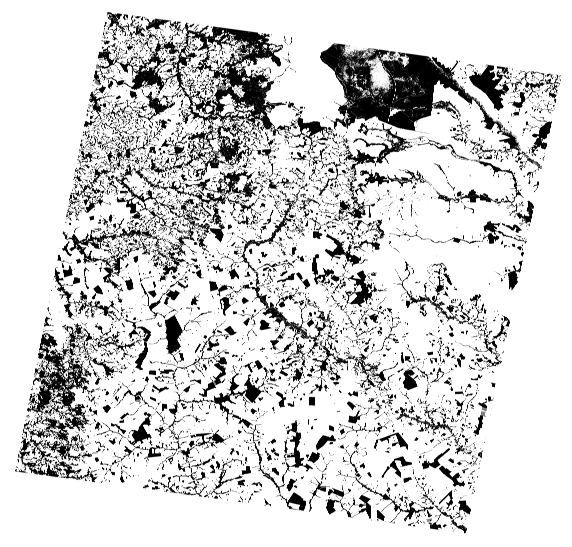

In [ ]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
trainer.squeezeLabel()

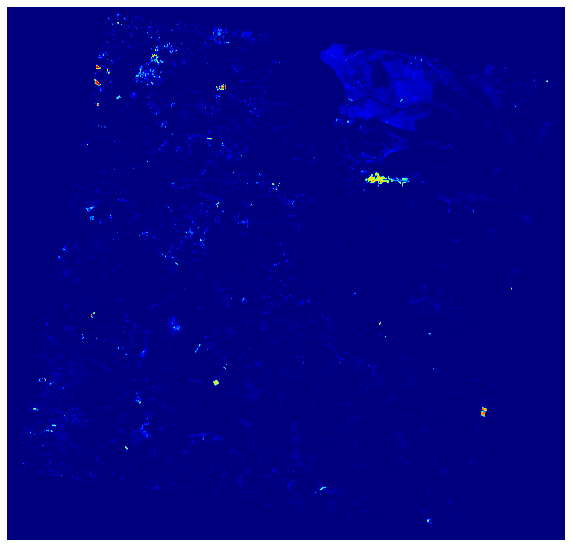

In [ ]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
print(trainer.label_mask.shape)

(18605, 19480)


In [ ]:
trainer.getLabelTest()

(25642091,)
(array([0, 1], dtype=uint8), array([25473071,   169020], dtype=int64))


In [ ]:
# trainer.getMAP()

In [ ]:
trainer.prob_rec.shape

(18640, 19488, 1)

In [ ]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(1, 18640, 19488, 1)


In [ ]:
trainer.prob_rec.shape

(1, 18640, 19488, 1)

In [ ]:
trainer.logger.getStats(trainer.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 1.5813328e-07
    np.mean(value): 0.006024787
    np.max(value): 0.9532573


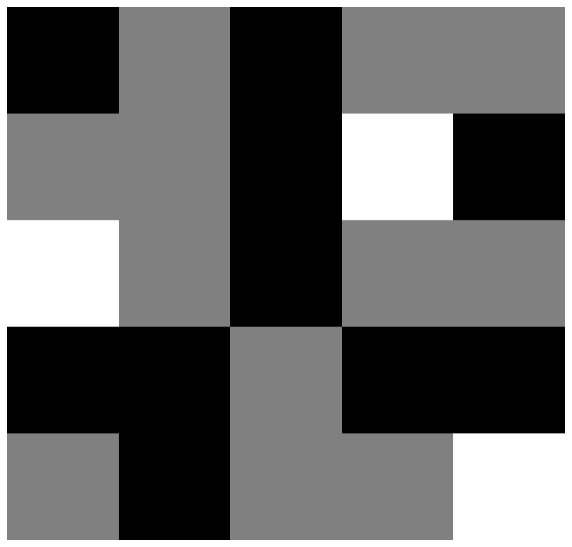

In [ ]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
trainer.getLabelCurrentDeforestation()

In [ ]:
trainer.applyProbabilityThreshold()

(18605, 19480)
Single entropy
(array([0., 1.], dtype=float32), array([361946673,    478727], dtype=int64))


ic| base.py:394 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (18605, 19480)
    self.predicted.shape: (18605, 19480)


In [ ]:
trainer.getTestValues()

ic| base.py:417 in getTestValues()- predicted_test.shape: (144970160,)
ic| base.py:426 in getTestValues()- predicted_test.shape: (25642091,)


In [ ]:
trainer.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([361981794,    443606], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([362034478,    390922], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([362372716,     52684], dtype=int64))


In [ ]:
trainer.calculateMetrics()

ic| base.py:470 in calculateMetrics()
    self.f1: 78.7
    self.precision: 81.81
    self.recall: 75.81


In [ ]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| base.py:399 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (43491048,)
ic| base.py:405 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (5775547,)
ic| base.py:481 in calculateMetricsValidation()
    f1_val: 7.41
    precision_val: 4.0
    recall_val: 50.84
    mAP_val: 42.01


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [ ]:
trainer.get_label_no_buffer()

D:/Jorge/datasets/deforestation/MS/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:456 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:459 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:463 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MS/deforestation_before_2000_MS.tif


ic| dataset.py:467 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([126708038, 235735967], dtype=int64))
ic| dataset.py:469 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([334024764,   8717093,   6541094,   3824922,   2096535,   1305948,
                                                                      1003721,    903906,    318788,    701575,    310887,    440417,
                                                                       316180,    560438,    600838,    776899], dtype=int64))
ic| dataset.py:448 in loadLabel()
    label_per_date.shape: (18605, 19481, 1)


In [ ]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([362129209,    296191], dtype=int64))


In [ ]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


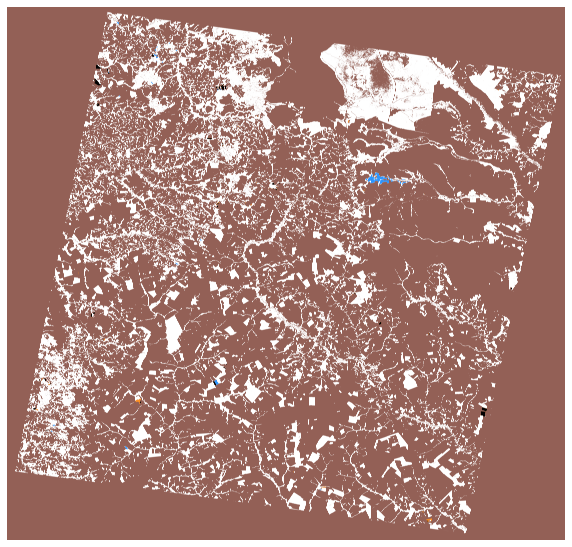

In [ ]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [ ]:
trainer.setUncertainty()

ic| uncertainty.py:49 in single_experiment_entropy()
    pred_entropy.shape: (18640, 19488)


In [ ]:
trainer.uncertainty_map[trainer.uncertainty_map>1] = 1

In [ ]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 2.47634e-06
    np.mean(value): 0.0153518375
    np.max(value): 0.36787948


In [ ]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.01172783
    np.max(value): 0.36787948


ic| 2250769769.py:4 in <cell line: 4>()
    trainer.uncertainty_to_show.shape: (18605, 19480)


(18605, 19480)

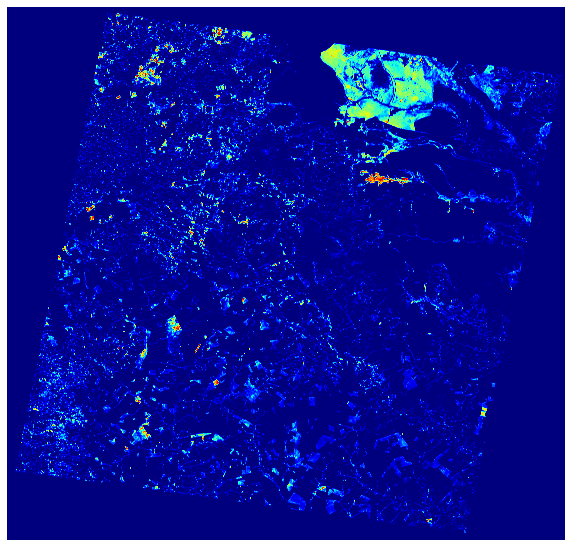

In [ ]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



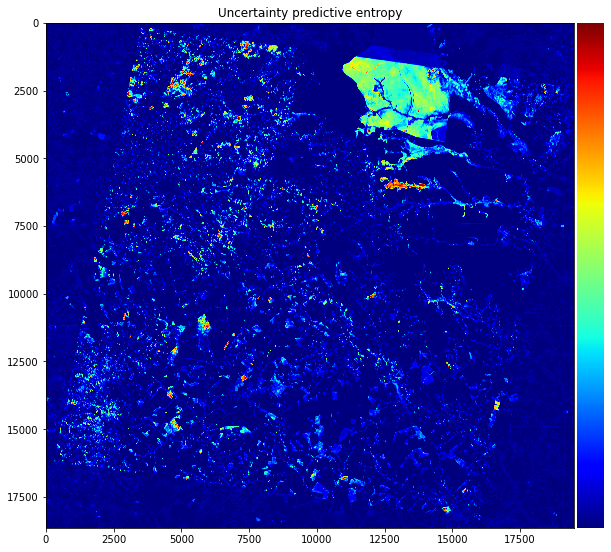

In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| base.py:521 in getTestValues2()
    self.label_mask.shape: (18605, 19480)
ic| base.py:522 in getTestValues2()
    self.mask_amazon_ts.shape: (18605, 19480)
ic| base.py:526 in getTestValues2()
    self.label_mask_test.shape: (144970160,)
ic| base.py:534 in getTestValues2()
    self.error_mask_test.shape: (25621687,)


In [ ]:
trainer.dataset.previewLims1 = np.array([5000, 7500,  12000, 14000])

ic| Logger.py:163 in plotCropSample()
    trainer.dataset.previewLims1: array([ 5000,  7500, 12000, 14000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| Logger.py:165 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([0], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


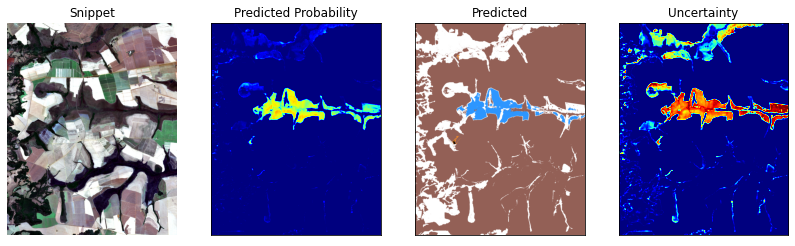

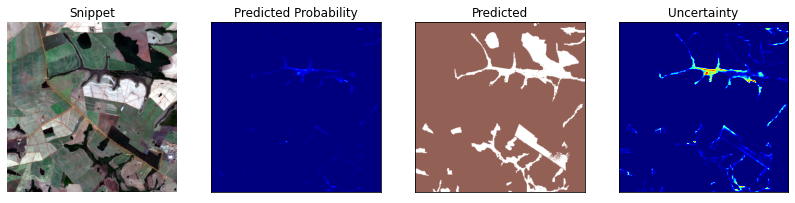

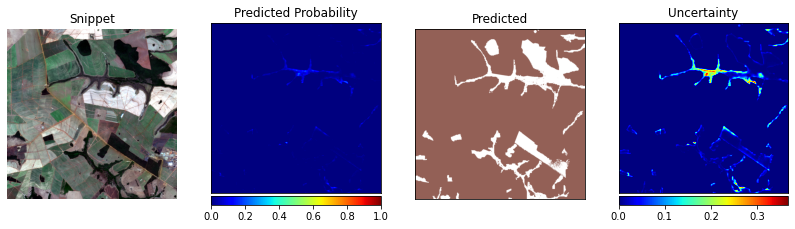

In [ ]:
trainer.logger.plotCropSample(trainer)

In [ ]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [ ]:
if config["plotLandsat"] == True:
    # del trainer.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [ ]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(trainer, ims)

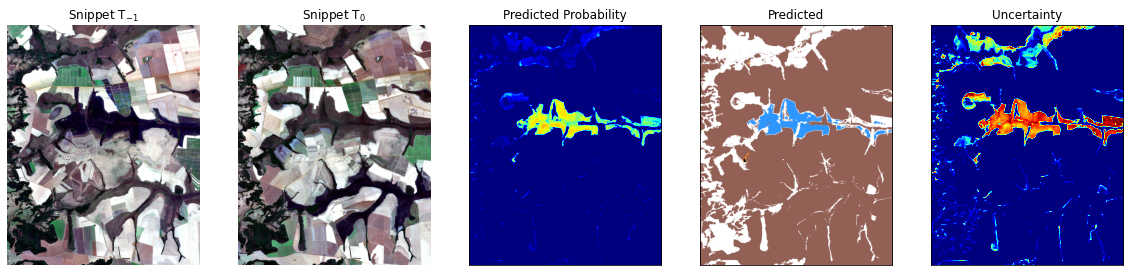

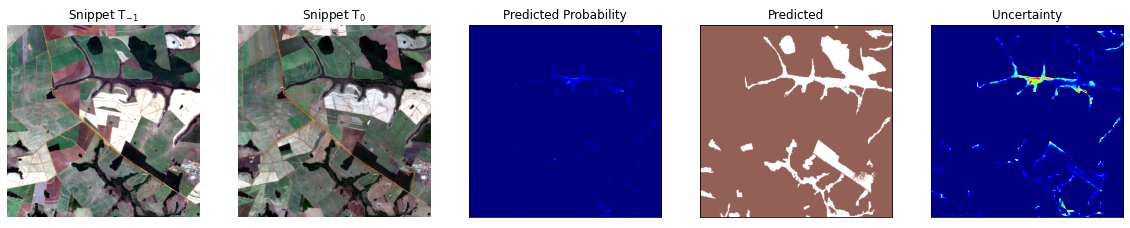

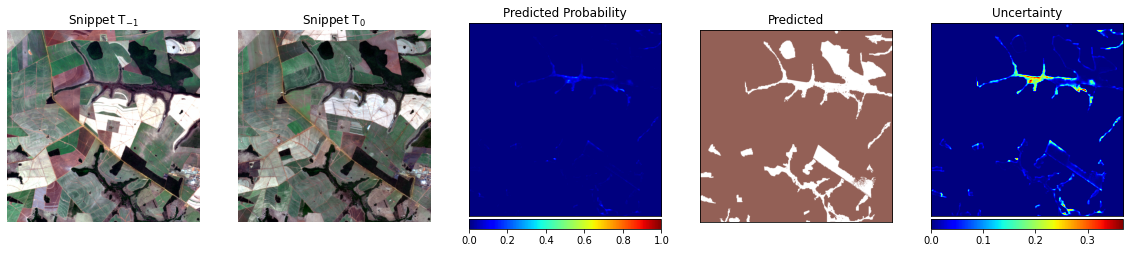

In [ ]:
trainer.logger.plotCropSampleT0T1(trainer)

In [ ]:
trainer.logger.getStats(trainer.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 2.9555194e-06
    np.mean(value): 0.053146772
    np.max(value): 0.36787948


In [ ]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(trainer.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(trainer.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':
    trainer.getPOIValues()


In [ ]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(trainer.snippet_poi_results, f)


In [ ]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [ ]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)



Get precision-recall threshold

In [ ]:

trainer.getUncertaintyAAValues()

ic| 810240186.py:62 in getUncertaintyAAValues()
    self.uncertainty.shape: (25621687,)
    self.label_mask_current_deforestation_test.shape: (25621687,)


[0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (17407850,)
    predicted_test_classified_incorrect.shape: (17407850,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 17407850
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 17407850
    len(label_mask_current_deforestation_test): 25621687


[       nan 0.         0.         0.67941857 0.81813229 0.75823724
 0.00378145]
threshold 0.01


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (16424696,)
    predicted_test_classified_incorrect.shape: (16424696,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16424696
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16424696
    len(label_mask_current_deforestation_test): 25621687


[       nan 0.         0.         0.64104663 0.81813229 0.75829868
 0.00400701]
threshold 0.015


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (14870620,)
    predicted_test_classified_incorrect.shape: (14870620,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 14870620
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 14870620
    len(label_mask_current_deforestation_test): 25621687


[       nan 0.         0.         0.58039192 0.81813229 0.75845944
 0.00442347]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (12561222,)
    predicted_test_classified_incorrect.shape: (12561222,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 12561222
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 12561222
    len(label_mask_current_deforestation_test): 25621687


[       nan 0.         0.         0.49025741 0.81813229 0.7595724
 0.00521792]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (8506082,)
    predicted_test_classified_incorrect.shape: (8506082,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8506082
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8506082
    len(label_mask_current_deforestation_test): 25621687


[1.00000000e+00 2.47148289e-02 1.62044251e-04 3.31987585e-01
 8.18100485e-01 7.62983224e-01 7.61962820e-03]
threshold 0.08


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (5725674,)
    predicted_test_classified_incorrect.shape: (5725674,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5725674
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 5725674
    len(label_mask_current_deforestation_test): 25621687


[1.         0.502961   0.01535058 0.22346983 0.81506887 0.76617616
 0.0110705 ]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4530070,)
    predicted_test_classified_incorrect.shape: (4530070,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4530070
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4530070
    len(label_mask_current_deforestation_test): 25621687


[1.         0.68021134 0.04413213 0.17680608 0.80903788 0.76354972
 0.01379054]
threshold 0.15


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2746001,)
    predicted_test_classified_incorrect.shape: (2746001,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2746001
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2746001
    len(label_mask_current_deforestation_test): 25621687


[1.         0.79770115 0.15571206 0.10717487 0.78140031 0.74854797
 0.02162199]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1545528,)
    predicted_test_classified_incorrect.shape: (1545528,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1545528
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1545528
    len(label_mask_current_deforestation_test): 25621687


[0.99950269 0.82537194 0.27557495 0.06032109 0.74131378 0.7244454
 0.03631733]
threshold 0.225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1052505,)
    predicted_test_classified_incorrect.shape: (1052505,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1052505
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1052505
    len(label_mask_current_deforestation_test): 25621687


[0.99647073 0.84608317 0.37305703 0.04107868 0.69724429 0.68878757
 0.05147207]
threshold 0.25


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (780368,)
    predicted_test_classified_incorrect.shape: (780368,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 780368
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 780368
    len(label_mask_current_deforestation_test): 25621687


[0.9904915  0.86158438 0.48757245 0.03045732 0.62282829 0.62329328
 0.06618226]
threshold 0.27


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (623702,)
    predicted_test_classified_incorrect.shape: (623702,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 623702
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 623702
    len(label_mask_current_deforestation_test): 25621687


[0.97697456 0.86931411 0.57411031 0.02434274 0.54281407 0.54193738
 0.07789021]
threshold 0.3


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (430121,)
    predicted_test_classified_incorrect.shape: (430121,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 430121
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 430121
    len(label_mask_current_deforestation_test): 25621687


[0.91749357 0.87318099 0.6753942  0.01678738 0.43427207 0.36531477
 0.08859209]
threshold 0.34


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (217273,)
    predicted_test_classified_incorrect.shape: (217273,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 217273
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 217273
    len(label_mask_current_deforestation_test): 25621687


[0.82648622 0.86096333 0.74941103 0.00848004 0.4380863  0.06739141
 0.08087884]
threshold 0.36


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (105394,)
    predicted_test_classified_incorrect.shape: (105394,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 105394
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 105394
    len(label_mask_current_deforestation_test): 25621687


[0.81813229 0.81286753 0.75814272 0.00411347        nan 0.
 0.06732777]
threshold 0.3648794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (63870,)
    predicted_test_classified_incorrect.shape: (63870,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 63870
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 63870
    len(label_mask_current_deforestation_test): 25621687


[0.81813229 0.79065596 0.75814272 0.00249281        nan 0.
 0.05359043]
threshold 0.3663794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (45293,)
    predicted_test_classified_incorrect.shape: (45293,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 45293
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 45293
    len(label_mask_current_deforestation_test): 25621687


[0.81813229 0.7803595  0.75814272 0.00176776        nan 0.
 0.04286304]


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| base.py:663 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (25621687,)
    self.label_mask_current_deforestation_test.shape: (25621687,)


threshold 0.0075
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [      20   160430]]
[1.         0.99987535]
threshold 0.01
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [      33   160417]]
[1.         0.99979433]
threshold 0.015
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [      67   160383]]
[1.         0.99958242]
threshold 0.025
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [     302   160148]]
[1.         0.99811779]
threshold 0.05
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [    1026   159424]]
[1.         0.99360548]
threshold 0.08
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [    2434   158016]]
[1.         0.98483017]
threshold 0.1
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [    3329   157121]]
[1.        0.9792521]
threshold 0.15
(25621687,) (25621687,)
cm_audited [[25461237        0]
 [    6336   154114]]
[1.         0.96051106]
threshold 0.2
(25621687,) (25621687,)
cm_audited [[25461215    

ic| base.py:669 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[1.        , 0.99987535],
                                  [1.        , 0.99979433],
                                  [1.        , 0.99958242],
                                  [1.        , 0.99811779],
                                  [1.        , 0.99360548],
                                  [1.        , 0.98483017],
                                  [1.        , 0.9792521 ],
                                  [1.        , 0.96051106],
                                  [0.99985442, 0.94169523],
                                  [0.99858452, 0.93213462],
                                  [0.99494729, 0.9216703 ],
                                  [0.9854073 , 0.91369274],
                                  [0.9369076 , 0.90190714],
                                  [0.84818013, 0.87897787],
                                  [0.83045013, 0.82546588],
                                  [0.82585988, 0.

cm_audited [[25434196    27041]
 [   34238   126212]]
[0.82355321 0.78661265]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

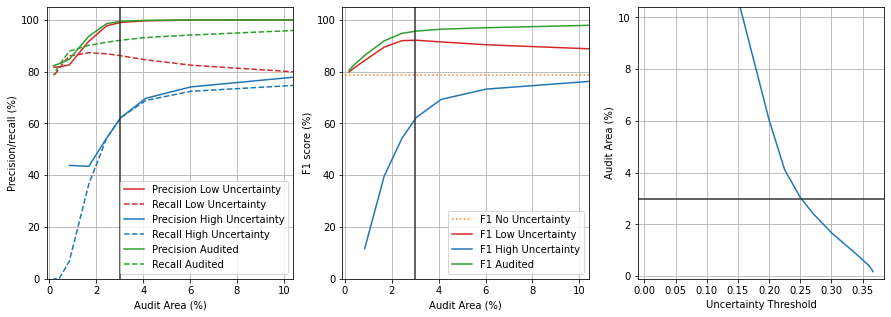

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA(normalize_xlim=False)

In [ ]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| base.py:771 in getOptimalUncertaintyThreshold()
    bounds: (0.0015, 0.3663794801235199)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2984966,)
    predicted_test_classified_incorrect.shape: (2984966,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2984966
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2984966
    len(label_mask_current_deforestation_test): 25621687


[1.         0.79147039 0.13717669 0.11650154 0.78653246 0.75115537
 0.02007781]
0.22700792051372695
threshold 0.22700792051372695


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1025084,)
    predicted_test_classified_incorrect.shape: (1025084,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1025084
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1025084
    len(label_mask_current_deforestation_test): 25621687


[0.99610124 0.84767132 0.38216267 0.04000845 0.69239157 0.68464358
 0.05267368]
0.28024311921958583
threshold 0.28024311921958583


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (553363,)
    predicted_test_classified_incorrect.shape: (553363,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 553363
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 553363
    len(label_mask_current_deforestation_test): 25621687


[0.96084149 0.87132983 0.6120162  0.02159745 0.50437776 0.49100542
 0.08278863]
0.2560759150248489
threshold 0.2560759150248489


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (729246,)
    predicted_test_classified_incorrect.shape: (729246,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 729246
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 729246
    len(label_mask_current_deforestation_test): 25621687


[0.9883146  0.86417646 0.5144718  0.02846206 0.59999693 0.60215004
 0.06982949]
0.25502085959443715
threshold 0.25502085959443715


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (737923,)
    predicted_test_classified_incorrect.shape: (737923,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 737923
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 737923
    len(label_mask_current_deforestation_test): 25621687


[0.98874176 0.86371031 0.50959177 0.02880072 0.60433399 0.60622644
 0.06919   ]
0.2443208689903861
threshold 0.2443208689903861


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (831331,)
    predicted_test_classified_incorrect.shape: (831331,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 831331
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 831331
    len(label_mask_current_deforestation_test): 25621687


[0.99205934 0.85876343 0.4609598  0.03244638 0.6432175  0.64154726
 0.06289754]
0.2512365201448627
threshold 0.2512365201448627


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (769765,)
    predicted_test_classified_incorrect.shape: (769765,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 769765
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 769765
    len(label_mask_current_deforestation_test): 25621687


[0.9900705  0.86220245 0.4928015  0.03004349 0.61861033 0.61932124
 0.06692714]
0.2485949764581901
threshold 0.2485949764581901


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (792668,)
    predicted_test_classified_incorrect.shape: (792668,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 792668
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 792668
    len(label_mask_current_deforestation_test): 25621687


[0.99100232 0.86089894 0.48119663 0.03093739 0.62783995 0.62791979
 0.06536129]
0.25160452268840217
threshold 0.25160452268840217


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (766646,)
    predicted_test_classified_incorrect.shape: (766646,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 766646
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 766646
    len(label_mask_current_deforestation_test): 25621687


[0.98996843 0.86232081 0.49450296 0.02992176 0.61719046 0.61808326
 0.06713728]
0.2510922668777984
threshold 0.2510922668777984


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (771020,)
    predicted_test_classified_incorrect.shape: (771020,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 771020
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 771020
    len(label_mask_current_deforestation_test): 25621687


[0.99015748 0.86212882 0.49218448 0.03009248 0.61908631 0.61979666
 0.06684182]
0.251364798184078
threshold 0.251364798184078


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768662,)
    predicted_test_classified_incorrect.shape: (768662,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768662
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768662
    len(label_mask_current_deforestation_test): 25621687


[0.99001964 0.8622609  0.49335619 0.03000044 0.61816145 0.61889986
 0.06700379]
0.2513981352457538
threshold 0.2513981352457538


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768388,)
    predicted_test_classified_incorrect.shape: (768388,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768388
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768388
    len(label_mask_current_deforestation_test): 25621687


[0.99001013 0.86226723 0.49349953 0.02998975 0.61804262 0.61879918
 0.06702181]
0.2513314611224022
threshold 0.2513314611224022


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768941,)
    predicted_test_classified_incorrect.shape: (768941,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768941
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768941
    len(label_mask_current_deforestation_test): 25621687
ic| base.py:775 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.251364798184078


[0.99004228 0.86224479 0.49325023 0.03001133 0.61823789 0.6189852
 0.06698399]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.251364798184078


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (768662,)
    predicted_test_classified_incorrect.shape: (768662,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768662
    len(label_mask_current_deforestation_test): 25621687
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 768662
    len(label_mask_current_deforestation_test): 25621687


[0.99001964 0.8622609  0.49335619 0.03000044 0.61816145 0.61889986
 0.06700379]
threshold 0.251364798184078
(25621687,) (25621687,)


ic| base.py:804 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.03000044]),
                     'UEO': array([0.06700379]),
                     'f1': 78.7,
                     'f1_H': array([0.61853044]),
                     'f1_L': array([0.92173427]),
                     'precision_H': array([0.61816145]),
                     'precision_L': array([0.99001964]),
                     'recall_H': array([0.61889986]),
                     'recall_L': array([0.8622609]),
                     'recall_Ltotal': array([0.49335619])}
ic| base.py:805 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.95650261]),
                             'precision': array([0.99462999]),
                             'recall': array([0.9211904])}


cm_audited [[25460439      798]
 [   12645   147805]]
[0.99462999 0.9211904 ]


{'metrics': {'precision_L': array([0.99001964]),
  'recall_L': array([0.8622609]),
  'recall_Ltotal': array([0.49335619]),
  'AA': array([0.03000044]),
  'precision_H': array([0.61816145]),
  'recall_H': array([0.61889986]),
  'UEO': array([0.06700379]),
  'f1_L': array([0.92173427]),
  'f1_H': array([0.61853044]),
  'f1': 78.7},
 'metrics_audited': {'precision': array([0.99462999]),
  'recall': array([0.9211904]),
  'f1': array([0.95650261])},
 'exp': 2}